# Activity #11
Recommendation System (Neural Collaborative Filtering)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
# Read data from 2 files:
df_R = pd.read_csv('./ratings.csv',nrows=5000)
df_M = pd.read_csv('./movies.csv',nrows=5000)

In [3]:
df = df_R.merge(df_M,left_on='movieId',right_on='movieId')

In [4]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
99995,757,1151,3.5,1184015224,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
99996,757,1329,4.0,1186425688,Blood for Dracula (Andy Warhol's Dracula) (1974),Horror
99997,757,1341,3.5,1186425698,Burnt Offerings (1976),Horror
99998,757,1757,3.5,1184074767,Fallen Angels (Duo luo tian shi) (1995),Drama|Romance


In [5]:
userId_list = np.unique(df['userId'])

In [6]:
dict_user = dict()
Index = 0 
for ids in sorted(userId_list):
    dict_user[ids] = Index
    Index +=1

In [7]:
num_unique_users = len(userId_list)

In [8]:
num_unique_users

757

In [9]:
movieId_list = np.unique(df['movieId'])

In [10]:
num_unique_movies = len(movieId_list)

In [11]:
num_unique_movies

9786

In [12]:
dict_movie = dict()
Index = 0 
for ids in sorted(movieId_list):
    dict_movie[ids] = Index
    Index +=1

In [13]:
df['userId'] = df['userId'].map(dict_user)

In [14]:
df

,userId,movieId,rating,timestamp,title,genres
0,0,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,2,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,3,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,4,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,6,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
99995,756,1151,3.5,1184015224,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
99996,756,1329,4.0,1186425688,Blood for Dracula (Andy Warhol's Dracula) (1974),Horror
99997,756,1341,3.5,1186425698,Burnt Offerings (1976),Horror
99998,756,1757,3.5,1184074767,Fallen Angels (Duo luo tian shi) (1995),Drama|Romance


In [15]:
df['movieId'] = df['movieId'].map(dict_movie)

In [16]:
df = df.dropna()

# Data after merging 2 dataframe

In [17]:
df

,userId,movieId,rating,timestamp,title,genres
0,0,259,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,2,259,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,3,259,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,4,259,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,6,259,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
99995,756,868,3.5,1184015224,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy
99996,756,1017,4.0,1186425688,Blood for Dracula (Andy Warhol's Dracula) (1974),Horror
99997,756,1026,3.5,1186425698,Burnt Offerings (1976),Horror
99998,756,1299,3.5,1184074767,Fallen Angels (Duo luo tian shi) (1995),Drama|Romance


# Preapare Train, validation data

In [18]:
x_train,x_val = train_test_split(df,test_size=0.3,random_state=23,stratify=df.rating)

In [19]:
df_train = x_train.drop(['timestamp','title','genres'],axis=1)
df_val = x_val.drop(['timestamp','title','genres'],axis=1)

In [20]:
df_train

,userId,movieId,rating
18042,157,382,4.0
72719,22,1513,4.0
43221,498,522,3.0
67622,434,1383,3.0
67467,194,7471,4.5
...,...,...,...
55245,571,3034,3.0
95363,356,7560,4.0
38485,461,2253,4.0
63330,445,2989,3.0


In [21]:
df_val

,userId,movieId,rating
18301,71,510,5.0
99753,652,9515,4.0
94184,669,2639,4.0
57919,620,1086,2.0
60274,674,1751,4.0
...,...,...,...
43333,406,537,3.0
43059,652,512,5.0
44620,739,1082,3.0
73312,71,2094,3.0


# 11.2 Model Preparation and Training

In [22]:
num_unique_users

757

In [23]:
num_unique_movies

9786

In [3]:
# Create Model NCF
EMBEDDING_SIZE=1500
users_input = Input(shape=(1,), name="users_input")
users_embedding = Embedding(num_unique_users + 1, EMBEDDING_SIZE,
name="users_embeddings")(users_input)
users_bias = Embedding(num_unique_users + 1, 1, name="users_bias")(users_input)

movies_input = Input(shape=(1,), name="movies_input")
movies_embedding = Embedding(num_unique_movies + 1, EMBEDDING_SIZE,
name="movies_embeddings")(movies_input)
movies_bias = Embedding(num_unique_movies + 1, 1, name="movies_bias")(movies_input)

dot_product_users_movies = tf.math.multiply(users_embedding, movies_embedding)
input_terms = dot_product_users_movies + users_bias + movies_bias
input_terms = Flatten(name="fl_inputs")(input_terms)
output = Dense(1, activation="relu", name="output")(input_terms)
model = Model(inputs=[users_input, movies_input], outputs=output)

opt_adam = Adam(lr = 0.005)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

NameError: name 'num_unique_users' is not defined

In [ ]:
model.summary()

Epoch 1/10
1094/1094 [==============================] - 166s 151ms/step - loss: 1.5529 - mean_absolute_error: 0.9264 - val_loss: 0.8710 - val_mean_absolute_error: 0.7174
Epoch 2/10
1094/1094 [==============================] - 179s 163ms/step - loss: 0.4733 - mean_absolute_error: 0.5296 - val_loss: 0.8380 - val_mean_absolute_error: 0.7187
Epoch 3/10
1094/1094 [==============================] - 180s 165ms/step - loss: 0.1935 - mean_absolute_error: 0.3401 - val_loss: 0.9068 - val_mean_absolute_error: 0.7675
Epoch 4/10
1094/1094 [==============================] - 173s 158ms/step - loss: 0.0855 - mean_absolute_error: 0.2267 - val_loss: 0.8103 - val_mean_absolute_error: 0.7061
Epoch 5/10
1094/1094 [==============================] - 169s 154ms/step - loss: 0.0862 - mean_absolute_error: 0.2282 - val_loss: 0.8089 - val_mean_absolute_error: 0.7029
Epoch 6/10
1094/1094 [==============================] - 173s 158ms/step - loss: 0.0871 - mean_absolute_error: 0.2319 - val_loss: 0.8012 - val_mean_abs

# 11.3 Model Performance Evaluation

NameError: name 'history' is not defined

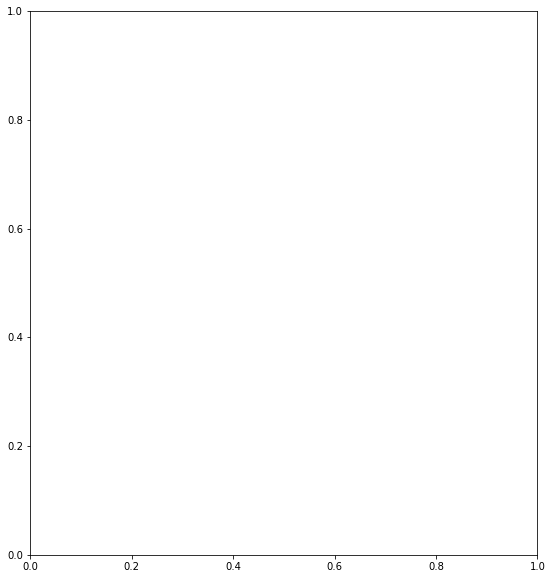

In [4]:
# ------------ Visualize loss -------------------------------
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_error')
plt.title('mean_absolute_error')
fig.add_subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss : MSE')
plt.show()


In [38]:
# ------------ Model Prediction -------------------------------
userPredictR = pd.DataFrame(model.predict([df_val.userId, df_val.movieId]))

In [39]:
userPredictR

,0
0,4.006792
1,3.628439
2,3.610931
3,3.597161
4,3.764375
...,...
29995,4.087988
29996,4.382549
29997,3.793235
29998,3.752539
